In [1]:
from matplotlib.pyplot import figure
from scipy import stats
from scipy.optimize import curve_fit
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pingouin as pg
import scipy.io
import seaborn as sns

In [2]:
df = pd.read_csv('../data/behav.csv')
df

,subj,block,success_rate,condition,run,stage
0,GL03,0,0.076389,FB,1,early
1,GL04,0,0.287153,FB,1,early
2,GL05,0,0.092708,FB,1,early
3,GL06,0,0.029167,FB,1,early
4,GL07,0,0.128819,FB,1,early
...,...,...,...,...,...,...
1723,GL24,71,0.513889,Test,6,late
1724,GL25,71,0.684375,Test,6,late
1725,GL26,71,0.362153,Test,6,late
1726,GL27,71,0.682639,Test,6,late


# Figure S1 - Fig. 1 style

In [3]:
df_fig = df[df.condition != 'Test']
df_fig

,subj,block,success_rate,condition,run,stage
0,GL03,0,0.076389,FB,1,early
1,GL04,0,0.287153,FB,1,early
2,GL05,0,0.092708,FB,1,early
3,GL06,0,0.029167,FB,1,early
4,GL07,0,0.128819,FB,1,early
...,...,...,...,...,...,...
1147,GL24,47,0.056944,nFB,4,late
1148,GL25,47,0.217708,nFB,4,late
1149,GL26,47,0.190625,nFB,4,late
1150,GL27,47,0.076042,nFB,4,late


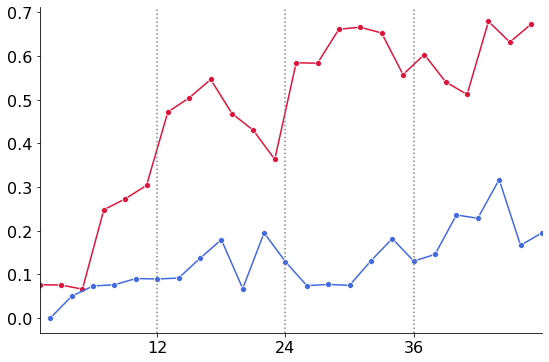

In [4]:
plt.figure(figsize=(9,6))

minor = [0, 11, 23, 35, 47]
# major = [0.5*(minor[i+1]+minor[i]) for i in range(len(minor)-1)]
# major = [5, 11, 17, 23, 29, 35, 41]
major = [11, 23, 35]

ax = sns.lineplot(
    data=df_fig[df_fig.subj=='GL03'], x='block', y='success_rate', hue='condition', style='condition', 
    marker='o', dashes=False, palette=['crimson', 'royalblue']
)

ax.set(xlim=(0,47))
ax.set_xlabel(None)
# ax.set_xticks(minor[:4], minor=True)
ax.set_xticks(major, minor=False)
# ax.set_xticklabels(['1', '2', '3', '4'], minor=False)
# ax.set_xticklabels(['6', '12', '18', '24', '30', '36', '42'], minor=False)
ax.set_xticklabels(['12', '24', '36'], minor=False)
# ax.grid(axis='y')
ax.grid(axis='x', which='minor')
# for text, new in zip(ax.legend(fontsize=16).texts, ['Continuous feedback', 'Binary feedback']):
#     text.set_text(new)
ax.get_legend().remove()
# ax.set_ylabel('Success Rate', fontsize=18)
ax.set_ylabel(None)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.axvline(x=11, color='gray', linestyle='dotted')
plt.axvline(x=23, color='gray', linestyle='dotted')
plt.axvline(x=35, color='gray', linestyle='dotted')

# fname = '/Users/clmn/Desktop/Andy/Articles/2023/GL/figures/fig1/fig_CFBF.png'
# plt.savefig(fname, dpi=600)
# plt.close()

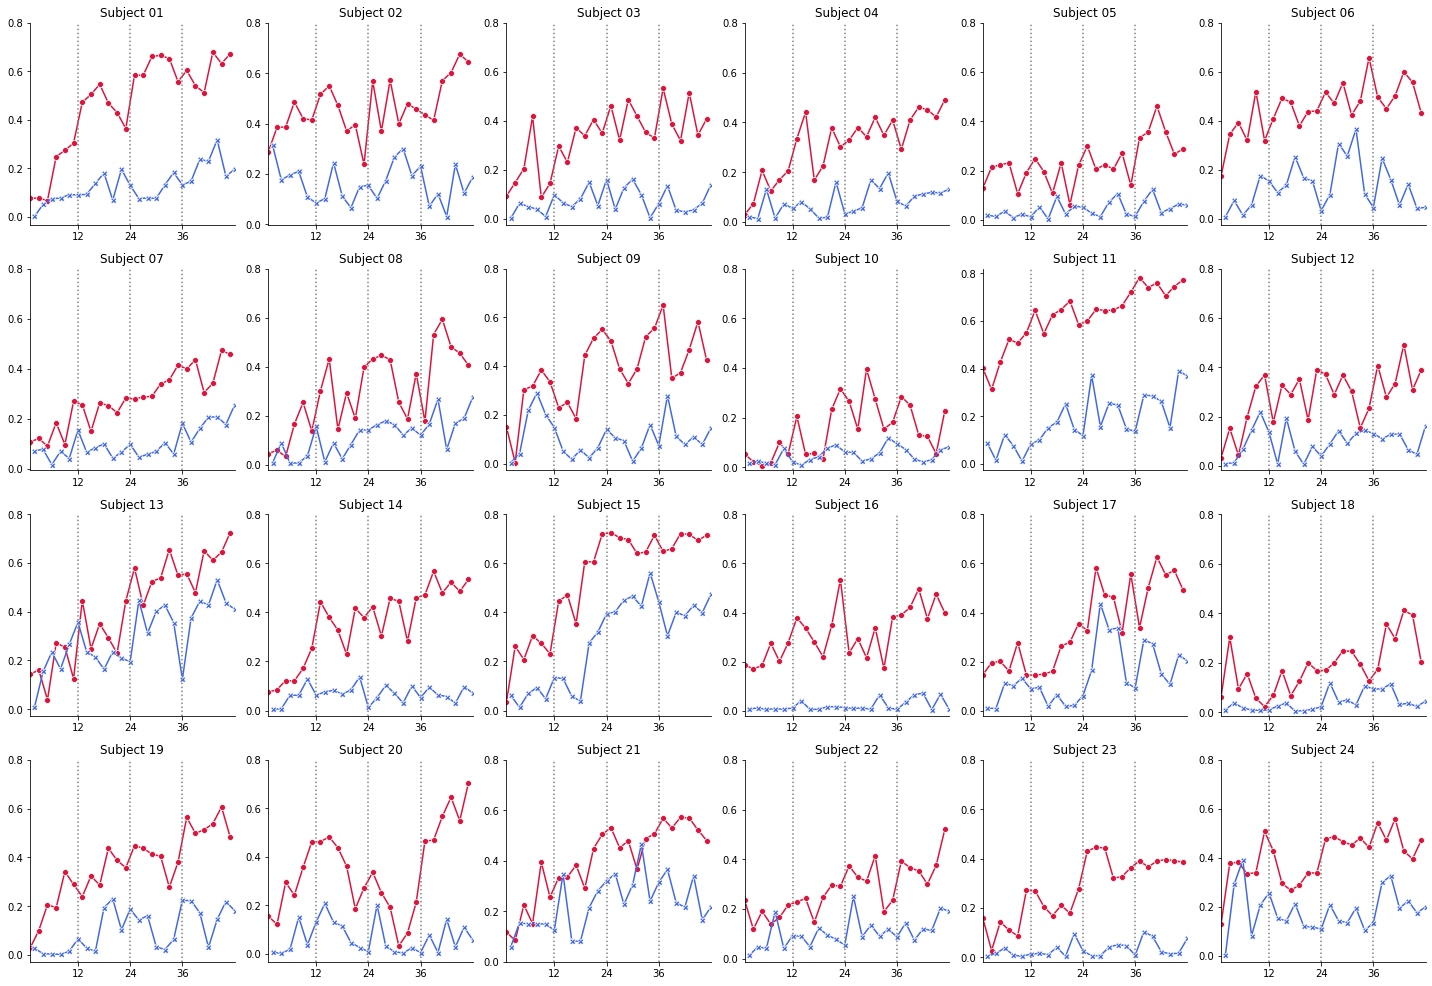

In [5]:
subjects = df_fig['subj'].head(24)

# Setup the figure and subplots
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(20, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each subject
for i, subj in enumerate(subjects):
    ax = axes[i]
    sns.lineplot(
        data=df_fig[df_fig.subj==subj], x='block', y='success_rate', hue='condition', style='condition', 
        markers=True, dashes=False, palette=['crimson', 'royalblue'], ax=ax
    )

    ax.set_xlim(0, 47)
    ax.set_xlabel(None)
    minor = [0, 11, 23, 35, 47]
    major = [11, 23, 35]
    ax.set_xticks(major, minor=False)
    ax.set_xticklabels(['12', '24', '36'], minor=False)
    ax.grid(axis='x', which='minor')
    if ax.get_legend():
        ax.get_legend().remove()
    ax.set_ylabel(None)
    ax.tick_params(axis='both', which='major')
    ax.set_yticks(np.arange(0,0.801,step=0.2))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

    # Vertical lines
    ax.axvline(x=11, color='gray', linestyle='dotted')
    ax.axvline(x=23, color='gray', linestyle='dotted')
    ax.axvline(x=35, color='gray', linestyle='dotted')
    
    ax.set_title(f'Subject {i+1:02d}')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rectangle in which to fit the subplots.

# fname = '../figures/figS1_fig1.png'
# plt.savefig(fname, dpi=600)
# plt.close()

# Figure S1 - PNAS style

In [6]:
df_CF = df[df.condition == 'FB']
df_BF = df[df.condition == 'nFB']
df_CF

,subj,block,success_rate,condition,run,stage
0,GL03,0,0.076389,FB,1,early
1,GL04,0,0.287153,FB,1,early
2,GL05,0,0.092708,FB,1,early
3,GL06,0,0.029167,FB,1,early
4,GL07,0,0.128819,FB,1,early
...,...,...,...,...,...,...
1123,GL24,46,0.704861,FB,4,late
1124,GL25,46,0.480556,FB,4,late
1125,GL26,46,0.520833,FB,4,late
1126,GL27,46,0.384722,FB,4,late


/var/folders/5l/5jx0ryjd29d_6j6kvcyfc7cr0000gn/T/ipykernel_56103/262047277.py:2: RuntimeWarning: overflow encountered in exp
  return a*(1-np.exp(-b*x))+c


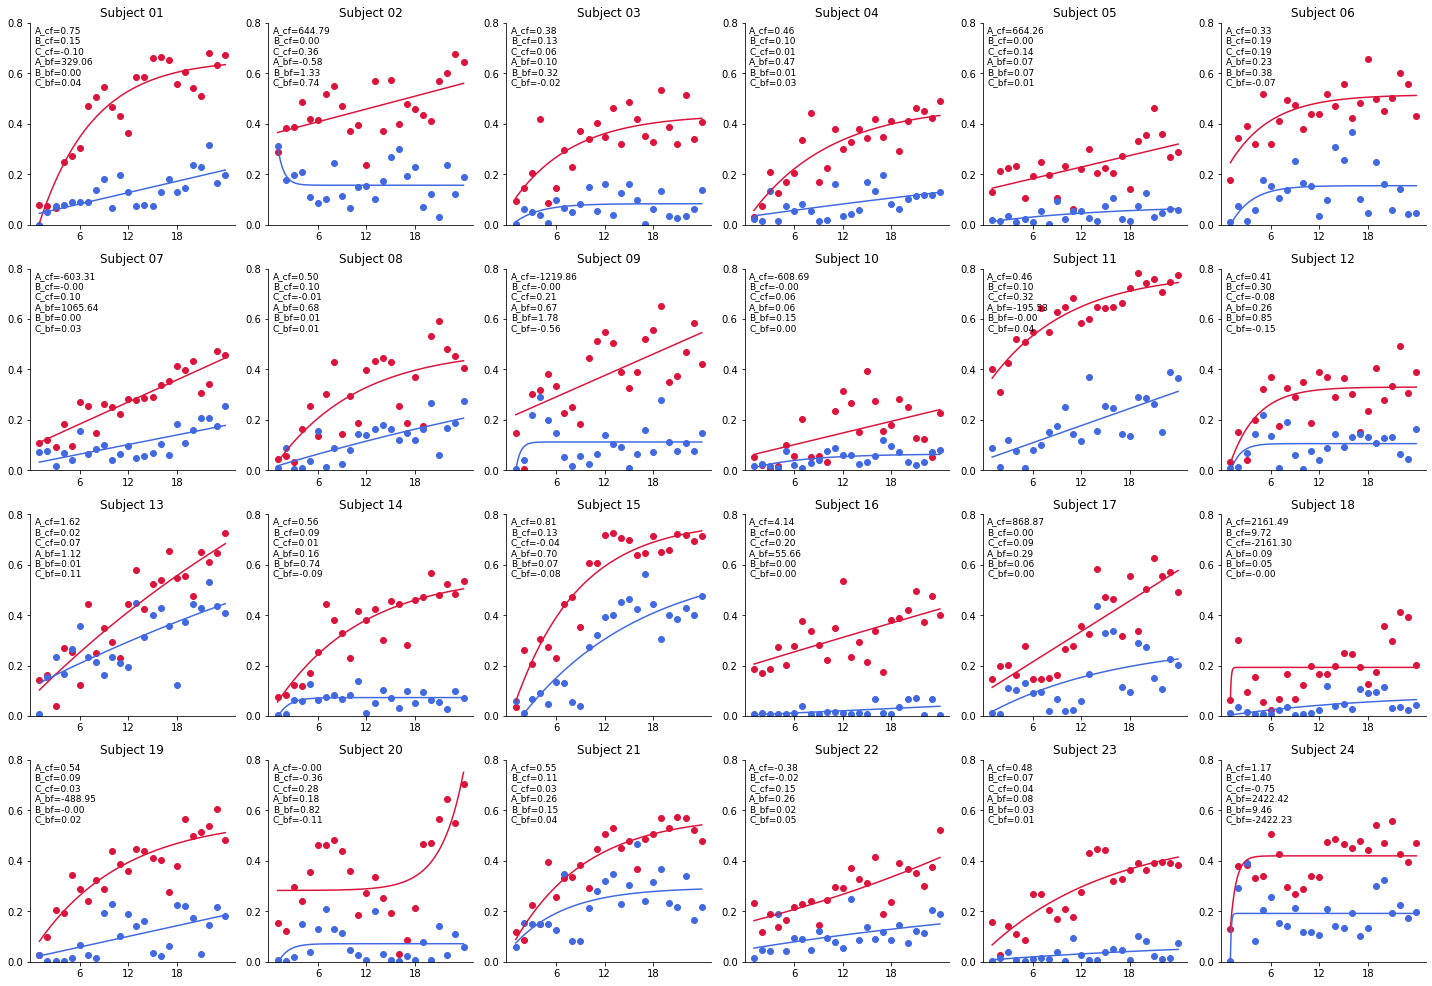

In [7]:
def func(x, a, b, c):
    return a*(1-np.exp(-b*x))+c

subjects = df_CF['subj'].head(24)
x = np.arange(1,25)

# Setup the figure and subplots
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(20, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each subject
for i, subj in enumerate(subjects):
    x_CF = np.arange(1,25)
    y_CF = df_CF[df_CF.subj==f'{subj}']['success_rate']
    x_BF = np.arange(1,25)
    y_BF = df_BF[df_BF.subj==f'{subj}']['success_rate']

    params_CF, params_covariance_CF = curve_fit(func, x_CF, y_CF, maxfev=2000)
    params_BF, params_covariance_BF = curve_fit(func, x_BF, y_BF, maxfev=2000)

    # Generate y data using the fitted parameters for a smoother curve
    x_model_CF = np.linspace(min(x), max(x), 400)
    y_model_CF = func(x_model_CF, *params_CF)
    x_model_BF = np.linspace(min(x), max(x), 400)
    y_model_BF = func(x_model_BF, *params_BF)

    # Plotting the data
    ax = axes[i]
    ax.scatter(x_CF, y_CF, color='crimson')
    ax.scatter(x_BF, y_BF, color='royalblue')
    ax.plot(x_model_CF, y_model_CF, color='crimson')
    ax.plot(x_model_BF, y_model_BF, color='royalblue')

    ax.set(ylim=(0,0.8))
    ax.set_xticks([6, 12, 18])
    ax.set_yticks(np.arange(0,0.801,step=0.2))

    ax.text(0.4, 0.8-0.245, f'A_cf={params_CF[0]:.2f}\n' +\
                            f'B_cf={params_CF[1]:.2f}\n' +\
                            f'C_cf={params_CF[2]:.2f}\n' +\
                            f'A_bf={params_BF[0]:.2f}\n' +\
                            f'B_bf={params_BF[1]:.2f}\n' +\
                            f'C_bf={params_BF[2]:.2f}', fontsize = 9)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_title(f'Subject {i+1:02d}')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rectangle in which to fit the subplots.

# fname = '../figures/figS1_PNAS.png'
# plt.savefig(fname, dpi=600)
# plt.close()